# Data preprocessing


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_train=pd.read_csv("/content/train.csv")
df_test=pd.read_csv("/content/test.csv")

df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### NAN means corrupted values
### surived is our traget column we check he/she survied or not

In [2]:
df_train.shape

(891, 12)

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
## age there is 714 outof 891 so there present some corrupted values
## same for cabin
## same for embarked
df_train.describe()
# describe does not show string values


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# what we wanted to drop
# persons who paid more money having different ticket //fare && ticket are same for that reason

l1 = ['PassengerId','Name','Ticket']
# there is a inplace variable  in drop function by default it is false we should make it true so the drop function effect the main data
# else it doesn't reflect on main data



In [7]:
df_train.drop(l1, axis=1, inplace=True)

In [8]:
df_test.drop(l1,axis=1,inplace=True)

In [9]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [10]:
df_train.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [11]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
# df_train.isnull() gives us where the value is corrupted is true
# and where the value is not corrupted as false
# df_train.isnull().sum() gives in column how many values are corrupted
# df_train.isnull().sum().sum() gives in total how many values are corrupted
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
#  cabin column contains 687 corrupted values which is more so we drop that whole column
l2=['Cabin']
df_train.drop(l2,axis=1,inplace=True)
df_test.drop(l2,axis=1,inplace=True)

In [14]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
df_train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [16]:
#replace NAN value
# for what value means we want check mean ,mode , median any one of them we can choose by the problem
df_train['Age'].mean()

29.69911764705882

In [17]:
# now replace with fillna function
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)


In [18]:
df_train.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [19]:
df_train['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [20]:
df_train['Embarked'].fillna('S',inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [21]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [22]:
#drop row of frame
df_test.dropna(inplace=True)

In [23]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [24]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Data Cleaning is Completed

#### Data Cleaning is Completed now few more to be don eto complete data preprocessing

In [25]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [26]:
# we are getting copy of data frame not original

df_train[df_train['Survived']==1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C
...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C
879,1,1,female,56.0,0,1,83.1583,C
880,1,2,female,25.0,0,1,26.0000,S
887,1,1,female,19.0,0,0,30.0000,S


In [27]:
# we are only one specified column sex
df_train[df_train['Survived']==1]['Sex']

1      female
2      female
3      female
8      female
9      female
        ...  
875    female
879    female
880    female
887    female
889      male
Name: Sex, Length: 342, dtype: object

In [28]:
# def means function declaration
# (s ) we are giving column name
def graph(s):
  sur=df_train[df_train['Survived']==1][s].value_counts()
  passed=df_train[df_train['Survived']==0][s].value_counts()
  df=pd.DataFrame([sur,passed])
  # stacked provide us ovelapping values if we remove we ger merged one
  df.plot(kind='bar')
  #print(df.head())


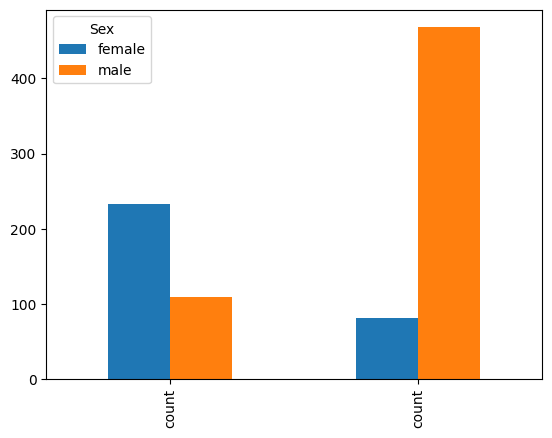

In [29]:
graph('Sex')

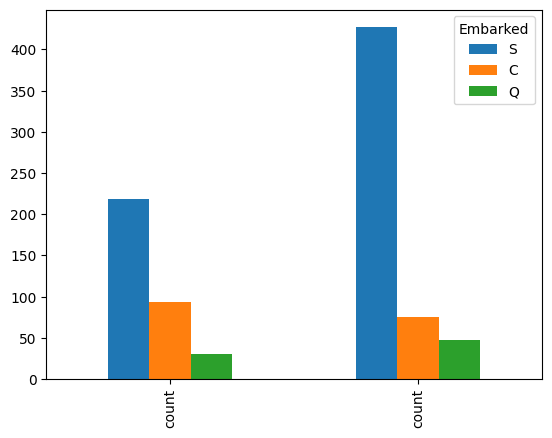

In [30]:
graph('Embarked')

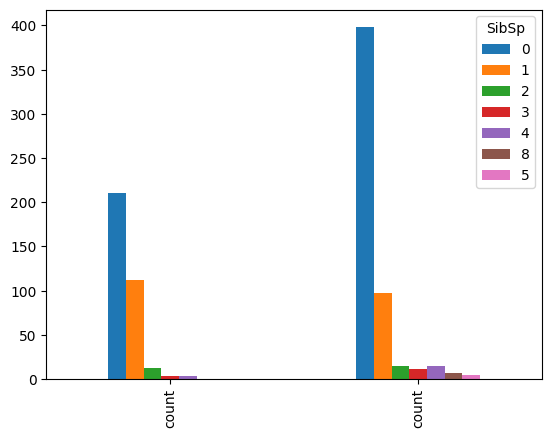

In [31]:
graph('SibSp')

# label encoding

In [32]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [36]:
# 2 things are there on is sex other is embarked to be changed to label encorder
from sklearn.preprocessing import LabelEncoder
le_S=LabelEncoder()
le_E=LabelEncoder()
df_train['Sex']=le_S.fit_transform(df_train['Sex'])
df_train['Embarked']=le_S.fit_transform(df_train['Embarked'])

In [37]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [41]:
df_test['Sex']=le_S.fit_transform(df_test['Sex'])
df_test['Embarked']=le_E.fit_transform(df_test['Embarked'])

In [42]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [43]:
le_S.classes_

array([0, 1])

In [44]:
x_train=df_train.iloc[ : , 1:].values
y_train=df_train.iloc[ : , 0].values
x_test=df_test.values


In [46]:
x_train.shape,y_train.shape,x_test.shape

((891, 7), (891,), (417, 7))

In [47]:
x_train[:10,:]

array([[ 3.        ,  1.        , 22.        ,  1.        ,  0.        ,
         7.25      ,  2.        ],
       [ 1.        ,  0.        , 38.        ,  1.        ,  0.        ,
        71.2833    ,  0.        ],
       [ 3.        ,  0.        , 26.        ,  0.        ,  0.        ,
         7.925     ,  2.        ],
       [ 1.        ,  0.        , 35.        ,  1.        ,  0.        ,
        53.1       ,  2.        ],
       [ 3.        ,  1.        , 35.        ,  0.        ,  0.        ,
         8.05      ,  2.        ],
       [ 3.        ,  1.        , 29.69911765,  0.        ,  0.        ,
         8.4583    ,  1.        ],
       [ 1.        ,  1.        , 54.        ,  0.        ,  0.        ,
        51.8625    ,  2.        ],
       [ 3.        ,  1.        ,  2.        ,  3.        ,  1.        ,
        21.075     ,  2.        ],
       [ 3.        ,  0.        , 27.        ,  0.        ,  2.        ,
        11.1333    ,  2.        ],
       [ 2.        ,  0.    

In [48]:
from sklearn.preprocessing import StandardScaler
scale_x=StandardScaler()
x_train=scale_x.fit_transform(x_train)
x_test=scale_x.fit_transform(x_test)

In [49]:
x_train[:10 ,:]

array([[ 0.82737724,  0.73769513, -0.5924806 ,  0.43279337, -0.47367361,
        -0.50244517,  0.58595414],
       [-1.56610693, -1.35557354,  0.63878901,  0.43279337, -0.47367361,
         0.78684529, -1.9423032 ],
       [ 0.82737724, -1.35557354, -0.2846632 , -0.4745452 , -0.47367361,
        -0.48885426,  0.58595414],
       [-1.56610693, -1.35557354,  0.40792596,  0.43279337, -0.47367361,
         0.42073024,  0.58595414],
       [ 0.82737724,  0.73769513,  0.40792596, -0.4745452 , -0.47367361,
        -0.48633742,  0.58595414],
       [ 0.82737724,  0.73769513,  0.        , -0.4745452 , -0.47367361,
        -0.47811643, -0.67817453],
       [-1.56610693,  0.73769513,  1.87005862, -0.4745452 , -0.47367361,
         0.39581356,  0.58595414],
       [ 0.82737724,  0.73769513, -2.13156761,  2.24747049,  0.76762988,
        -0.22408312,  0.58595414],
       [ 0.82737724, -1.35557354, -0.20770885, -0.4745452 ,  2.00893337,
        -0.42425614,  0.58595414],
       [-0.36936484, -1.3555

# we completed our Data Preprocessing

# Model fitting

In [50]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()
clf.fit(x_train,y_train)
# clf.fit(this feature,to this traget)

KNeighborsClassifier()

In [54]:
pred=clf.predict(x_train)
# above line say's passing only features to predict for what out put they belong to
# pred=clf.predict(x_train)
(pred==y_train).sum()

764

In [57]:
pred[:10],y_train[:10]

(array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1]), array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1]))

In [55]:
y_train.shape,pred.shape

((891,), (891,))

In [56]:
(pred==y_train).sum()/pred.shape
## this give us accuracy


array([0.85746352])